# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

##Data Cleaning
import nltk #
import string #to remove all punctuation marks in the corpus/ document
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

# set plot style
sns.set()

# Loading Data

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## view the `data`

In [4]:
#set the dataframe to show whole text

In [5]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-5-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [6]:
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [7]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [8]:
# cehcking the dataset dimensions
print("The shape of the training set is :")
print(df_train.shape)
print("The shape of testing set is :")
print(df_test.shape)
#adding the rows of both training and testing set for the total enteries
print("the total entries of the dataset")
print(len(df_train)+len(df_test))

The shape of the training set is :
(15819, 3)
The shape of testing set is :
(10546, 2)
the total entries of the dataset
26365


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [10]:
type_sentiment = list(df_train.sentiment.unique())
print(type_sentiment)

[1, 2, 0, -1]


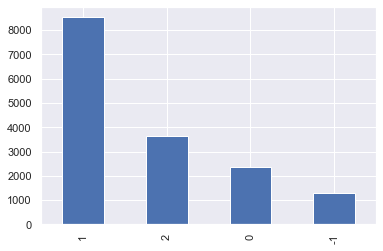

In [11]:
#look at how many data samples we have for each sentiment 
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

# Data Cleaning


In [12]:
#removing noise i.e Uppercaase letters, special characters as urls

In [13]:
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [14]:
#remove urls and replace them with word 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace=pattern_url,value =subs_url, regex = True)

#convert all lowercase to uppercasse
df_train['message']= df_train['message'].str.lower()

#remove special characters, symbols 
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df_train['message'] = df_train['message'].apply(remove_punctuation)

In [15]:
df_train.head(10)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
5,1,worth a read whether you do or dont believe in climate change urlweb urlweb,425577
6,1,rt thenation mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb,294933
7,1,rt makeandmendlife six big things we can all do today to fight climate change or how to be a climate activistã¢â‚¬â¦ urlweb hã¢â‚¬â¦,992717
8,1,aceofspadeshq my 8yo nephew is inconsolable he wants to die of old age like me but will perish in the fiery hellscape of climate change,664510
9,1,rt paigetweedy no offense… but like… how do you just not believe… in global warming………,260471


# Tokenize 

In [16]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['message'].apply(tokeniser.tokenize)

df_train['tokens'].head()

0    [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, urlweb, via, mashable]
1    [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]                                                                
2    [rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, urlweb, urlweb…]        
3    [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, urlweb]                                           
4    [rt, soynoviodetodas, its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]   
Name: tokens, dtype: object

# Lemmenisation

In [17]:
#nltk.download('wordnet')
def train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

lemmatizer = WordNetLemmatizer()

df_train['lemma'] = df_train['tokens'].apply(train_lemma, args=(lemmatizer, ))


In [18]:
#print out lemmmatisation results
for i, t in enumerate(df_train.iloc[13]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[13]['lemma'][i]))

rt                   --> rt        
alifaith55           --> alifaith55
oh                   --> oh        
my                   --> my        
god                  --> god       
trumps               --> trump     
government           --> government
removes              --> remove    
climate              --> climate   
change               --> change    
page                 --> page      
from                 --> from      
epa                  --> epa       
website              --> website   
hours                --> hour      
ahead                --> ahead     
of                   --> of        
climatemarch         --> climatemarch
urlweb…              --> urlweb…   


In [19]:
# function removes stop words from the text

def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

#apply function to dataset

df_train['lemma'] = df_train['tokens'].apply(remove_stop_words)

In [20]:
df_train

,sentiment,message,tweetid,tokens,lemma
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, urlweb, via, mashable]","[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, urlweb, via, mashable]"
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[its, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]"
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562,"[rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, urlweb, urlweb…]","[rt, rawstory, researchers, say, three, years, act, climate, change, it’s, late, urlweb, urlweb…]"
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736,"[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, urlweb]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change, urlweb]"
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954,"[rt, soynoviodetodas, its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]","[rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]"
...,...,...,...,...,...
15814,1,rt ezlusztig they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https…,22001,"[rt, ezlusztig, they, took, down, the, material, on, global, warming, lgbt, rights, and, health, care, but, now, theyre, hocking, melanias, qvc, https…]","[rt, ezlusztig, took, material, global, warming, lgbt, rights, health, care, theyre, hocking, melanias, qvc, https…]"
15815,2,rt washingtonpost how climate change could be breaking up a 200millionyearold relationship urlweb,17856,"[rt, washingtonpost, how, climate, change, could, be, breaking, up, a, 200millionyearold, relationship, urlweb]","[rt, washingtonpost, climate, change, could, breaking, 200millionyearold, relationship, urlweb]"
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in … urlweb,384248,"[notiven, rt, nytimesworld, what, does, trump, actually, believe, about, climate, change, rick, perry, joins, other, aides, in, …, urlweb]","[notiven, rt, nytimesworld, trump, actually, believe, climate, change, rick, perry, joins, aides, …, urlweb]"
15817,-1,rt sara8smiles hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byã¢â‚¬â¦,819732,"[rt, sara8smiles, hey, liberals, the, climate, change, crap, is, a, hoax, that, ties, to, agenda2030, the, climate, is, being, changed, byã¢â‚¬â¦]","[rt, sara8smiles, hey, liberals, climate, change, crap, hoax, ties, agenda2030, climate, changed, byã¢â‚¬â¦]"
